<a href="https://www.kaggle.com/code/natthakitcheawketwit/context-topic-modeling?scriptVersionId=182056760" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install contractions
!pip install pyspellchecker
!pip install pythainlp
!pip install -U sentence-transformers
!pip install bertopic 
!pip install octis
!pip install khamyo
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.7 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━

In [2]:
import numpy as np 
import pandas as pd 
import re
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('/kaggle/input/song-th-en-200/Top_song_200_4_27_24 (1).xlsx')   ###
df = df.iloc[:,[1,-3]]
df.head()

,Name Song,Lyrics Cleaned Ver1
0,Like Crazy,"She's saying, Baby, come and follow me \nTher..."
1,Standing Next to You,Standing next to you\nPlay me slow\nI push up ...
2,FRI(END)S,(Friends)\n\nYou're in my head\nI had plans fo...
3,Love Me Again,\nYou left me\nTook those memories with you\nB...
4,Nightwalker,nearing the hour\nSo I been waiting so long\nH...


## EDA

In [4]:
def lang_detect(txt):
    lang = set()
    for char in str(txt):
        if '\u0e00' <= char <= '\u0e7f':  # Thai
            lang.add('th')
        elif char.isalpha():  # Default to English
            lang.add('en')
    if len(lang) == 2:
        return  'th en'
    elif len(lang) == 1:
        return list(lang)[0]
    elif len(lang) == 0:
        return 'None'
df['lang'] = df['Lyrics Cleaned Ver1'].apply(lang_detect)

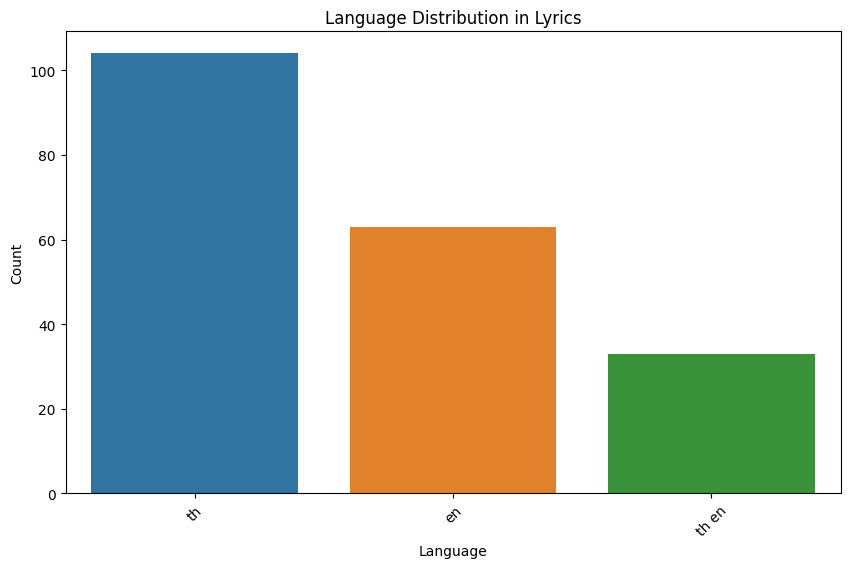

In [5]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='lang', order=df['lang'].value_counts().index)
plt.title('Language Distribution in Lyrics')
plt.xlabel('Language')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

## prepare only english lyrics

In [6]:
eng_df = df[df['lang'] == 'en'][['Name Song','Lyrics Cleaned Ver1']]
eng_df = eng_df.reset_index().iloc[:,1:]
eng_df = eng_df.rename(columns={'Lyrics Cleaned Ver1':'Lyrics'})
eng_df.head()

,Name Song,Lyrics
0,Like Crazy,"She's saying, Baby, come and follow me \nTher..."
1,Standing Next to You,Standing next to you\nPlay me slow\nI push up ...
2,FRI(END)S,(Friends)\n\nYou're in my head\nI had plans fo...
3,Love Me Again,\nYou left me\nTook those memories with you\nB...
4,Nightwalker,nearing the hour\nSo I been waiting so long\nH...


In [7]:
print(eng_df.Lyrics[0])

She's saying,  Baby, come and follow me 
There's not a bad thing here tonight
Save your reasons all for later
Stay with me a little while

Watch me go
Now, I sink down, all alone away
Where am I?
A dark haze clouding up my eyes

I can hear the voices listening
Don't know who they are
Trying to take the pressure off
Been reaching for the stars
Tell me, will I find myself again?
When I go too far?
Yeah, I know
You know, I know

I'd rather be
Lost in the lights, lost in the lights
I'm outta my mind
Can you help me numb the pain?
Each night, you spin me up high
Emotions on ice
Let me have a taste

Give me a good ride (I'm fallin', I'm fallin', I'm fallin')
it's gon' be a good night (I'm fallin')
Forever, you and I

Forever, you and I

All my reflections, I
Can't even recognize
I'm feelin' so alive, wasting time

I'd rather be
Lost in the lights
Lost in the lights
I'm outta my mind
Can you help me numb the pain?
Each night
You spin me up high
Emotions on ice
Let me have a taste

Give me a g

In [8]:
import contractions

# Assuming eng_lyrics is a pandas Series containing your lyrics text
eng_df['Lyrics'] = eng_df['Lyrics'].apply(lambda x: contractions.fix(x))
print(eng_df['Lyrics'][0])

She is saying,  Baby, come and follow me 
There is not a bad thing here tonight
Save your reasons all for later
Stay with me a little while

Watch me go
Now, I sink down, all alone away
Where am I?
A dark haze clouding up my eyes

I can hear the voices listening
Do not know who they are
Trying to take the pressure off
Been reaching for the stars
Tell me, will I find myself again?
When I go too far?
Yeah, I know
You know, I know

I would rather be
Lost in the lights, lost in the lights
I am outta my mind
Can you help me numb the pain?
Each night, you spin me up high
Emotions on ice
Let me have a taste

Give me a good ride (I am fallin', I am fallin', I am fallin')
it is gon' be a good night (I am fallin')
Forever, you and I

Forever, you and I

All my reflections, I
Cannot even recognize
I am feelin' so alive, wasting time

I would rather be
Lost in the lights
Lost in the lights
I am outta my mind
Can you help me numb the pain?
Each night
You spin me up high
Emotions on ice
Let me have 

In [9]:
def clean_contractions(text):
    text = ' '.join([i.strip() for i in text.split('\n') if i not in [' ','','  ', '   ']])
    text = re.sub(r"'s", " is ",text)
    text = re.sub(r"'re", " are ",text)
    text = re.sub(r"'re", " are ",text)   
    text = re.sub(r"'mma", "  am  ",text)  
    text = re.sub(r"'m", "  am  ",text)   
    text = re.sub(r"[\.,!()\[\]{};*:\"\\<>/?@_~-]", " ", text)
    text = re.sub(r"\s+", ' ',text)
    return text

eng_df['Lyrics'] = eng_df['Lyrics'].apply(clean_contractions)

In [10]:
eng_df['Lyrics'][0]

"She is saying Baby come and follow me There is not a bad thing here tonight Save your reasons all for later Stay with me a little while Watch me go Now I sink down all alone away Where am I A dark haze clouding up my eyes I can hear the voices listening Do not know who they are Trying to take the pressure off Been reaching for the stars Tell me will I find myself again When I go too far Yeah I know You know I know I would rather be Lost in the lights lost in the lights I am outta my mind Can you help me numb the pain Each night you spin me up high Emotions on ice Let me have a taste Give me a good ride I am fallin' I am fallin' I am fallin' it is gon' be a good night I am fallin' Forever you and I Forever you and I All my reflections I Cannot even recognize I am feelin' so alive wasting time I would rather be Lost in the lights Lost in the lights I am outta my mind Can you help me numb the pain Each night You spin me up high Emotions on ice Let me have a taste Give me a good ride I am

In [11]:
def find_abbreviation(text):    
    pattern1 = r"[A-Za-z]+'"
    pattern2 = r"'[A-Za-z]+"
    words = []
    matches1 = re.findall(pattern1, text)
    matches2 = re.findall(pattern2, text)
#     print(matches1)
    words.extend(matches1)
    words.extend(matches2)
    return words
eng_df.Abbreviation = eng_df.Lyrics.apply(find_abbreviation)

/tmp/ipykernel_23/2419245979.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  eng_df.Abbreviation = eng_df.Lyrics.apply(find_abbreviation)


In [12]:
print(eng_df['Lyrics'][8])

One two 3D I cannot touch you through the phone Or kiss you through the universe In another time zone It is the only time I cannot reverse But when there is two dimensions There is only one I am missin' And if you feel alone You do not have to feel that no more I just want to see you like that See you like that So if you are ready so if you are ready And if you will let me and if you will let me I want to see it in motion in 3D You will not regret me you will not regret me Champagne confetti champagnе confetti I want to see it in motion in 3D Because you know how I like it girl girl 3D You know how I likе it girl girl 3D Body to body to body to body to body You and me baby you know that we got it So do not go gettin' me started Because you know I get hot hearted Baby baby baby you makin' me crazy Rain rain rain you cannot fake it You give me brand new emotion You got me drinkin' that potion I just want to see you like that See you like that So if you are ready so if you are ready And i

In [13]:
# count =0 
# for i in range(len(abbreviation)):
#     print(i,abbreviation[i])

In [14]:
def find_abbreviation(text):    
    pattern1 = r"[A-Za-z]+'"
    pattern2 = r"'[A-Za-z]+"
    words = set()
    matches1 = re.findall(pattern, text)
    matches2 = re.findall(pattern, text)
    words.add(matches1)
    words.add(matches2)
    return list(words)

In [15]:
eng_df['Lyrics'][6]

"You know just from looking at my back When it gets dark the light shines pink When the bright light wakes me up I shake up the world What is my name What is my name What is my name What is my name I empty my head completely And burn the loud emotions Burn burn burn I am the champagne that will quench your thirst at that moment Sip sip drink me up Yes lift up my body higher Want you to ring the alarm Tell it to the world kiss my name Say Lalisa love me Lalisa love me Call me Lalisa love me Lalisa love me you know the attitude What more do you want The loudest in the room Say Lalisa love me Lalisa love me Call me Lalisa love me Lalisa love me you know the attitude What more do you want The loudest in the room Baby get the megaphone put it on speaker I said I cannot hear you so you need to speak up Put that shit on stereo everyone else on very low Protect it like a barrier promise there is nothing scarier Than me if anybody coming gunnin' for my man Going To catch a case gun up in my han

In [16]:
ingore_word = {
    'DNA': 'dna',
    'ayy': '',
    'ﬁneI': 'ﬁne i',
    'CELINE': 'celine',
    'wons': 'won',
    'Flintstones': 'flintstones',
    'BLACKPINK': 'blackpink',
    'Lalisa': 'lalisa',
    'Tuesday': 'tuesday',
    'Thursday': 'thursday',
    'Monday': 'monday',
    'Sunday': 'sunday',
    'Friday': 'friday',
    'Saturday': 'saturday',
    'Wednesday': 'wednesday',
    'Mondays': 'mondays',
    'Jung': 'jung',
    'Tampa': 'tampa',
    'bae': 'before anyone else',
    'Kentucky': 'kentucky',
    '3D': '',
    'gutsSo': 'guts so',
    'pullNo': 'pull no',
    'oppositesBut': 'opposites But',
    'crushLike': 'crush like',
    'backStraight': 'back Straight',
    'lightGirls': 'light Girls',
    'goLet': 'go Let',
    'magneticYou': 'magnetic You',
    'catchball': 'catchball',
    'okie': 'ok',
    'doke': 'done',
    '\u200bj': '',
    'neu': 'new',
    'body’s': 'body',
    'bibim': 'bible',
    'mе': 'mе',
    'Likе': 'like',
    'YouTube': 'YouTube',
    'Sheesh': '',
    'earsJust': 'ears Just',
    'lifeYeah': 'life Yeah',
    'outI': 'out I',
    'anywayYou': 'anyway You',
    'mo': '',
    'Rambo': 'Rambo',
    'skyAnd': 'sky And',
    'venomTaste': 'venom Taste',
    'domе': 'dome',
    'lowNo': 'low No',
    'winnerWanna': 'winner Wanna',
    'SSERAFIM': 'angel',
    'LE': '',
    'freeI': 'free I',
    'meBut': 'me But',
    'shitt': 'shit',
    'fearLeaving': 'fear Leaving',
    'vu': '',
    'anemoia': 'anemia',
    'déjà': '',
    'vuYou': 'you',
    'hyung': '',
    'Hyung': '',
    'villainI': 'villain I',
    'flamesI': 'flames I',
    'shadowsI': 'shadows I',
    'distantWhen': 'distant When',
    'takesOh': 'take',
    'flowerworkFlower': 'flowerwork Flower',
    'goTo': 'go To',
    'wishеd': 'wished',
    'feetAmongst': 'feet Amongst',
    'fieldAh': 'field',
    'flowerworkGonna': 'flowerwork Gonna',
    'voiceAnd': 'voice And',
    'smileThat': 'smile That',
    'frontNo': 'front No',
    'bеlieved': 'believed',
    'youWhen': 'you When',
    'sadnessEven': 'sadness Even',
    'flowerworksBoyhood': 'flowerworks',
    'imaginedAn': 'imagined',
    'youjeen': 'youjeen',
    'someoneBecause': 'someone Because',
    'airGrounded': 'air Grounded',
    'flowerwork': 'flowerwork',
    'tryna': 'trona',
    'wayHero': 'way Hero',
    'emotionalThe': 'emotional The',
    'morе': 'more',
    'thе': 'the',
    'whippin’Push': 'whipping Push',
    'easyYeah': 'easy',
    'bodyPull': 'body Pull',
    'runneth': 'runner',
    'actionView': 'action View',
    'meSip': 'me Sip',
    'traceWatch': 'trace Watch',
    'permissionYou': 'permission You',
    'missionWe': 'mission We',
    'stareI': 'stare I',
    'smoothieSmoothie': 'smoothie Smoothie',
    'itSmoothie': 'smoothie',
    'smoothiе': 'smoothie',
    'smoothieChew': 'smoothie Chew',
    'distortionCrush': 'distortion Crush',
    'commotionFlecks': 'commotion Flecks',
    'actionSkin': 'action Skin',
    'killa': 'kill',
    'thirstyShow': 'thirsty Show',
    'easyI': 'easy I',
    'buffWe': 'buff We',
    'stuffSyrup': 'stuff Syrup',
    'sufferRaise': 'suffer Raise',
    'clothesJust': 'cloth Just',
    'missin': 'missing',
    'cinnamonCome': 'cinnamon Come',
    'Cortina': 'she',
    'bleh': '',
    'blee': '',
    'Levi': 'Levi',
    'shyBut': 'shy But',
    'timeI': 'time I',
    'sparkleWhen': 'sparkle When',
    'Julio': 'he',
    'mamacita': 'she',
    'Puerto': 'he',
    'Cadillac': 'she',
    'fleeko': 'he',
    'Paris': 'Paris',
    'Miami': 'she',
    'Rico': 'he',
    'jammies': 'he',
    'MVP': 'MVP',
    'homerun': 'homerun',
    'brrah': '',
    'surprisе': 'surprise',
    'nеver': 'never',
    'mе': 'me',
    'liе': 'lie',
    'Nintendo': 'Nintendo',
    'Hennessy':'she',
    'Saturn':'Saturn',
    'Lamborghini':'Lamborghini',
    'Christmas':'Christmas',
    'Scarface':'Scarface'
}


In [17]:
from spellchecker import SpellChecker
from tqdm import tqdm
edit_word = []
def check_spell(text):
    global edit_word
    spell = SpellChecker()
    tokens = text.split(' ')
    words = []
    edit = []
    for token in tqdm(tokens):
        if token not in ingore_word:
            correct = spell.correction(token)
            if correct == None:
                correct = ''
            if correct != token:
                edit.append((token,correct))
            words.append(correct)
        else:
            words.append(ingore_word[token])
    edit_word.append(edit)
    txt = re.sub("\s+", " ", ' '.join(words))
    return txt

# check_spell(eng_df['Lyrics'][0])
eng_df['Edit_spell'] = eng_df.Lyrics.apply(check_spell)

100%|██████████| 366/366 [00:00<00:00, 100347.45it/s]


In [18]:
# for i in range(len(edit_word)):
#     print(i, [i for i in list(set(edit_word[i])) if "'" not in i[0]])

In [19]:
# from spellchecker import SpellChecker
# import spacy
# def clean_eng(text):
#     text = ' '.join([i.strip()+'.' for i in text.split('\n') if i not in [' ','','  ', '   ']])
#     text = re.sub(r'\s+',' ',text)
#     text = re.sub(r'in\'','ing',text)

#     return text.lower().strip()

# nlp = spacy.load("en_core_web_sm")

# count = 0
# # Function to prepare English text
# def prepare_eng(text):
#     global count 
#     spell = SpellChecker()
#     doc = nlp(text)

#     corrected_tokens = []
#     for token in doc:
#         if token.text.lower() != spell.correction(token.text.lower()):
#             corrected_tokens.append(spell.correction(token.text.lower()))
#         else:
#             lemma = token.lemma_.lower()
#             corrected_tokens.append(lemma)
#     corrected_text = ''
#     for i in corrected_tokens:
#         if i != None:
#             corrected_text+= str(i)
#             corrected_text+=' '
#     corrected_text = re.sub(r" +,", ",", corrected_text)
#     corrected_text = re.sub(r" +\.", ".", corrected_text)
#     corrected_text = re.sub(r"[!()\[\]{};*:'\"\\<>/?@_~-]", " ", corrected_text)
#     corrected_text = re.sub(r'\s+',' ',corrected_text)
#     if count %10 == 0:
#         print(f'success {count}')
#     count +=1
#     translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
#     result = corrected_text.translate(translator)
#     result = re.sub(r'\s+',' ',result)
#     return result.strip()

In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")
def lemma_eng(text):
    text.translate(str.maketrans('', '', string.punctuation))
    doc = nlp(text)

    corrected_tokens = []
    for token in doc:
        lemma = token.lemma_.lower()
        corrected_tokens.append(lemma)
    corrected_text = ' '.join(corrected_tokens)
    
    corrected_text = re.sub(r'\s+',' ',corrected_text)
    return corrected_text.strip()

In [21]:
# expand_eng_lyrics = expanded_lyrics.apply(clean_eng)
# eng_lyrics = expand_eng_lyrics.apply(prepare_eng) 

In [22]:
# eng_lyrics = eng_lyrics.apply(lambda x: re.sub(r'\s+',' ',x))
# eng_df['lema'][6]

In [23]:
eng_df['lema'] = eng_df.Lyrics.apply(lemma_eng)

In [24]:
eng_lyrics = list(eng_df['lema'])

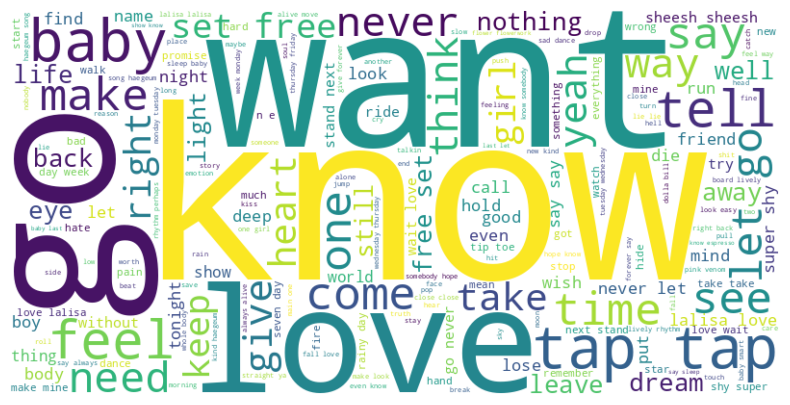

In [25]:
from wordcloud import WordCloud
import pythainlp
from pythainlp import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
stop_words = list(set(stopwords.words('english')))
stop_words.append(' ')
 

# Convert the pandas Series to a single string
text = ' '.join([i for i in word_tokenize(' '.join(eng_df['lema'])) if i not in stop_words])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers
plt.show()

## prepare TH lyrics

In [26]:
thai_df = df[df['lang'] == 'th'][['Name Song','Lyrics Cleaned Ver1']]
thai_df = thai_df.reset_index().iloc[:,1:]
thai_df = thai_df.rename(columns={'Lyrics Cleaned Ver1':'Lyrics'})
thai_df.head()

,Name Song,Lyrics
0,เผื่อวันไหนเธอจะกลับมา,เธอจากไปตั้งนาน เธอมีใครเข้ามา\nเราเดินแยกทาง ...
1,เพลงที่เธอไม่ฟัง,รู้สึกยังไงเก็บเอาไว้ไม่เคยคิดจะบอก\nเอ่ยปากตร...
2,จำนน (White Flag),ไม่รู้ว่านานเท่าไหร่ก็จำไม่ได้นัก\nที่ฉันจำเป็...
3,เมร่อน,เพื่อนฉันล่ะคนนี้ มันชื่ออีเมอะหอยใหญ่\nน่ารัก...
4,ดาวหางฮัลเลย์,ระหว่างที่มีดาวดวงนึงโคจรในอวกาศ\nจากวันนั้นฉั...


In [27]:
from pythainlp.util import abbreviation_to_full_text,normalize,remove_dup_spaces
def clean_th(text):
    text = str(' '.join([i.strip() for i in text.split('\n') if i not in [' ','','  ', '   ']]))
    text = remove_dup_spaces(text)
    text = normalize(text)
    
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'ๆ',' ',text)

    return text.strip()

In [28]:
thai_df['cleanning'] = thai_df['Lyrics'].apply(clean_th)
thai_df['cleanning']

0      เธอจากไปตั้งนาน เธอมีใครเข้ามา เราเดินแยกทาง แ...
1      รู้สึกยังไงเก็บเอาไว้ไม่เคยคิดจะบอก เอ่ยปากตรง...
2      ไม่รู้ว่านานเท่าไหร่ก็จำไม่ได้นัก ที่ฉันจำเป็น...
3      เพื่อนฉันล่ะคนนี้ มันชื่ออีเมอะหอยใหญ่ น่ารักส...
4      ระหว่างที่มีดาวดวงนึงโคจรในอวกาศ จากวันนั้นฉัน...
                             ...                        
99     เจ็บในใจต้องมาฟังเรื่องช้ำเธอบอก อยู่ประคองต้อ...
100    เธออยากถามสักคำได้ไหม วันนี้เห็นเธอสดใส อยากถา...
101    เคยสงสัย ว่าเรื่องของเราอยู่อยู่มันเกิดอะไร คน...
102    โปรดอย่ามองมามันทำให้ใจของฉันนั้นเริ่มรู้สึก ไ...
103    ถ้าเธอกำลังเดินทางไปไกลแสนไกล ในคืนบางคืนที่ฟ้...
Name: cleanning, Length: 104, dtype: object

In [29]:
from pythainlp.tokenize import word_tokenize

In [30]:
thai_dt = pd.read_excel('/kaggle/input/thai-song/thai_data.xlsx')   ###
def str2list(text):
    text = text.split(',')
    translator = str.maketrans("", "", string.punctuation)
    tokens = [i.translate(translator).strip() for i in text]
    return tokens

thai_temp = thai_dt.meaning_tokens.apply(str2list)
thai_corpus = []
for i in thai_temp:
    thai_corpus.extend(i)
thai_corpus = list(set(thai_corpus))

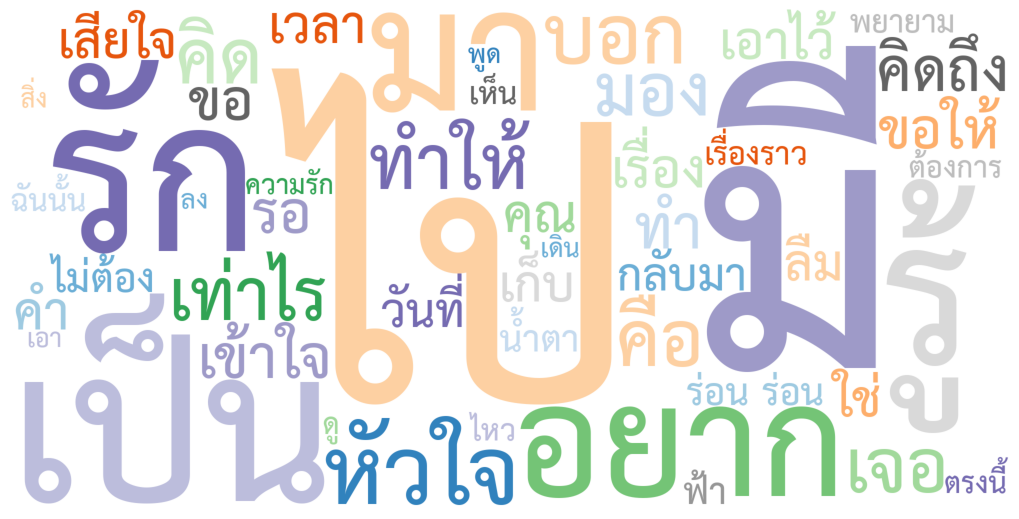

In [31]:
temp = ' '.join(thai_df['cleanning'])
thai_text = ' '.join([i for i in word_tokenize(temp, engine="newmm") if i in thai_corpus])
wordcloud = WordCloud(
#     font_path='c:/windows/fonts/browalia.ttc',
    font_path='/kaggle/input/th-sarabun/THSarabunNew Bold.ttf',
#     font_path='font_path/Kanit-Black.ttf',
#     font_path='font_path/Fahkwang-Medium.ttf',
    regexp='[ก-๙]+',
    width=2000, height=1000,

    prefer_horizontal=1,
    max_words=50, 

#     colormap='viridis', # default matplotlib colormap
    colormap='tab20c',
#     colormap='plasma',
    background_color = 'white').generate(thai_text)
plt.figure(figsize = (10, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
# plt.show()

In [32]:
thai_lyrics = list(thai_df['cleanning'])

## prepare TH-ENG lyrics

In [33]:
th_en_data = df[df['lang'] == 'th en'][['Name Song','Lyrics Cleaned Ver1']]
th_en_data = th_en_data.reset_index().iloc[:,1:]
th_en_data.head()

,Name Song,Lyrics Cleaned Ver1
0,ซ่อน(ไม่)หา,แค่ได้เจอ ก็รู้ในทันที ว่าในใจเธอ ไม่เหลือภาพเ...
1,รถไฟบนฟ้า,หากมีรถไฟบนฟ้า ขบวนนึงวิ่งไปทั่วสุริยะ\nมันก็ค...
2,วันนี้ปีที่แล้ว,ในวันนี้ เมื่อปีที่แล้ว\nคือวันที่เรานั้นเลิกก...
3,กำแพงหัวใจ,ได้โปรดเถอะขอร้อง\nถ้าใจเธอมันฟ้อง\nว่ามีใครคน...
4,เดินมาส่ง - BYE,เดินมาส่งเธอแค่นี้\nให้เธอไปดีกับทางของเธอ\nขอ...


In [34]:
def clean_th_eng(text):
    text = ' '.join([i.strip() for i in text.split('\n') if i not in [' ','','  ', '   ']])
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'in\'','ing',text)
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    result = text.translate(translator)
    result = re.sub(r'\s+',' ',result)
    result = re.sub(r'ๆ',' ',result)

    return result.lower().strip()

count = 0
def prepare_th_eng(text):
    global count
    spell = SpellChecker()
    tokens = text.split(' ')
    words = []
    ignore_words = {'vit':'vit','cuz':'because', 'tiffy':'tiffy','netflix':'netflix', 'c':'come', 'gucci':'gucci'}
    for i in tokens:
        if lang_detect(i) == 'en' and i not in ['vit','cuz', 'tiffy','netflix', 'c', 'gucci']:
            doc = nlp(i)
            for token in doc:
                if token.text.lower() != spell.correction(token.text.lower()):
                    temp = spell.correction(token.text.lower())
                    if temp != None:
                        words.append(temp)
                else:
                    lemma = token.lemma_.lower()
                    if lemma != None:
                        words.append(lemma)
        else:
            if i in ['vit','cuz', 'tiffy','netflix', 'c', 'gucci']:
                i = ignore_words[i]
            words.append(clean_th(i))
    if count % 5 == 0:
        print(f'success{count}')
    count += 1
    text = ' '.join(words).strip()
    result = re.sub(r'\s+',' ',text)
    return result.strip()

In [35]:
expanded_lyrics_th_en = th_en_data['Lyrics Cleaned Ver1'].apply(lambda x: contractions.fix(x))

In [36]:
te_data = expanded_lyrics_th_en.apply(clean_th_eng)
th_en_lyrics = te_data.apply(prepare_th_eng)

success0
success5
success10
success15
success20
success25
success30


In [37]:
th_en_lyrics[2]

'ในวันนี้ เมื่อปีที่แล้ว คือวันที่เรานั้นเลิกกัน ตอนนั้นฉันคิดว่ามันคงดีถ้าไม่มีเธอ แต่วันนี้ไม่มีอีกแล้ว และต่อให้ฉันขอร้องเท่าไร เธอคงไม่กลับมาหา คนที่ไล่ให้เธอไป กว่าจะรู้ว่าอยู่ไม่ไหว กว่าจะรู้ตัวว่าสาย กว่าจะเข้าใจเธอก็เดินไป เธอไม่รอแล้ว หยุดก่อน ฉันขอโทษที่โง่ไป ฉันขอโทษที่ไล่เธอไป ช่วยกลับมาอยู่ตรงนี้เหมือนเดิมได้ไหม แต่ก็รู้อยู่มันคงสายไป กับคำว่าเสียใจ ผ่านมาตั้งนานทำไมเพิ่งเข้าใจ ในวันนี้ เมื่อปีที่แล้ว คือวันที่เรานั้นเลิกกัน ตอนนั้นฉันคิดว่ามันคงดีถ้าไม่มีเธอ แต่วันนี้ไม่มีอีกแล้ว และต่อให้ฉันขอร้องเท่าไร เธอคงไม่กลับมาหา คนที่ไล่ให้เธอไป every night i miss you รู้บ้างไหม trona call แต่โดนตัดสาย แต่มันก็สมควร เพราะว่าที่ฉันทำไป ไม่น่าให้อภัย รู้ดีว่าฉันนั้นเป็นผู้ร้าย and i make you cry so many time แต่อยากจะขอเธอคืนได้ไหม แต่ก็รู้อยู่ รู้อยู่ มันคงสายไป สายไป กับคำว่าเสียใจ เสียใจ ผ่านมาตั้งนานทำไมเพิ่งเข้าใจ ในวันนี้ เมื่อปีที่แล้ว คือวันที่เรานั้นเลิกกัน ตอนนั้นฉันคิดว่ามันคงดีถ้าไม่มีเธอ แต่วันนี้ไม่มีอีกแล้ว และต่อให้ฉันขอร้องเท่าไร เธอคงไม่กลับมาหา คนที่ไล่ให้เธอไป อ

## prepare dataset

In [38]:
lyrics = []
lyrics.extend(list(eng_lyrics))
lyrics.extend(list(th_en_lyrics))
lyrics.extend(list(thai_lyrics))

print(len(lyrics))

200


In [39]:
from nltk.tokenize import word_tokenize as english_word_tokenize
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import (thai_stopwords, 
                              thai_words,
                              thai_syllables,
                             thai_negations,
                             thai_orst_words)
from pythainlp.corpus.ttc import word_freqs
from nltk.corpus import stopwords
import nltk
import spacy
from pythainlp.corpus.ttc import word_freqs
from nltk.corpus import words
nltk.download('punkt')
stop = stopwords.words("english")
nltk.download('averaged_perceptron_tagger')
nltk.download('words')  # Download the words corpus if you haven't already

nlp = spacy.load("en_core_web_sm")
# Access the words corpus

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [40]:
freqswords = word_freqs()
freq = 200 #Set frequency
freqsResults = []

for line in list(freqswords):
    if line[1] >= freq: #More than threshold means frequency
        freqsResults.append(line[0])

stop = []
stop.extend(list(thai_stopwords()))
stop.extend(freqsResults)
stop.extend(list(stopwords.words('english')))
stop.extend([' ','  ','   '])
stop.extend(['ooh','yeah','hey','whoa','woah', 'ohh', 'was', 'mmm', 'oooh','yah','yeh','mmm', 'hmm','deh','doh','jah','wa', 'oh', 'เม', 'ปะ', 'อะ','อี','ya','ad','yes','yet','สักที','ตรงนี้','ที่จะ' ,'รึเปล่า' ,'บอ' ,'could' ,'มั้ง' ,'ฟู' ,'อ้า' ,'ดิ' ,'ป่าว'])

corpus = []
eng_corpus = words.words()
# th_corpus = thai_words()
corpus.extend(list(eng_corpus))
corpus.extend(thai_corpus)

corpus_lower = [i.lower() for i in corpus]
corpus_new = list(set(corpus_lower)-set(stop))
stop_new = list(set(stop))

In [41]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
embeddings = model.encode(list(lyrics))

2024-06-07 13:59:15.092740: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 13:59:15.092847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 13:59:15.262918: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [42]:
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Assuming 'embeddings' is your data matrix
# Compute PCA with all components
pca_full = PCA(random_state=55)
pca_full.fit(embeddings)

# Calculate cumulative explained variance ratio
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Create a Plotly figure
fig = go.Figure()

# Add trace for cumulative explained variance ratio
fig.add_trace(go.Scatter(x=np.arange(1, len(cumulative_variance) + 1), y=cumulative_variance, mode='lines'))

# Add a horizontal line at y = 0.98
fig.add_shape(type='line',
              x0=1,
              y0=0.98,
              x1=len(cumulative_variance),
              y1=0.98,
              line=dict(color='red', width=1, dash='dash'))

# Find the index where cumulative variance first exceeds or meets 0.98
index_at_threshold = np.argmax(cumulative_variance >= 0.98) + 1

# Add a vertical line at the corresponding number of components
fig.add_shape(type='line',
              x0=index_at_threshold,
              y0=0,
              x1=index_at_threshold,
              y1=0.98,
              line=dict(color='green', width=1, dash='dash'))

# Update layout
fig.update_layout(
    xaxis_title='Number of Components',
    yaxis_title='Cumulative Explained Variance Ratio',
    title='Explained Variance Ratio by Number of Components',
    shapes=[
        dict(
            type='line',
            x0=1,
            y0=0.98,
            x1=len(cumulative_variance),
            y1=0.98,
            line=dict(color='red', width=1, dash='dash')
        ),
        dict(
            type='line',
            x0=index_at_threshold,
            y0=0,
            x1=index_at_threshold,
            y1=0.98,
            line=dict(color='green', width=1, dash='dash')
        )
    ]
)

# Show the interactive plot
fig.show()


In [43]:
desired_variance = 0.98
n_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"Number of components to explain {desired_variance * 100}% variance: {n_components}")

Number of components to explain 98.0% variance: 106


In [44]:
pca_full = PCA(random_state=55, n_components=106)
data = pca_full.fit_transform(embeddings)

In [45]:
import numpy as np
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of K values to try
k_values = range(2, 20)
silhouette_scores = []

# Iterate over different values of K
for k in k_values:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=55)
    cluster_labels = kmeans.fit_predict(data)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Manually set initial silhouette scores for better visualization
# silhouette_scores[0] = 0.059
# silhouette_scores[1] = 0.056

# Create a Plotly figure
fig = go.Figure()

# Add trace for silhouette scores
fig.add_trace(go.Scatter(x=list(k_values), y=silhouette_scores, mode='lines+markers'))

# Update layout
fig.update_layout(
    xaxis_title='Number of Clusters (K)',
    yaxis_title='Silhouette Score',
    title='Silhouette Score vs Number of Clusters'
)

# Show the interactive plot
fig.show()


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d153d0d1000>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /opt/conda/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


In [46]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from bertopic.dimensionality import BaseDimensionalityReduction

def tokenize(text):
    tokens = [x for x in word_tokenize(text, engine='newmm') if len(x) > 1]
#     tokens = [x for x in tokens if x in corpus_new]
    return tokens    

In [47]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from octis.evaluation_metrics.diversity_metrics import TopicDiversity

def table_result(topics,topic_model):
    words, prob, topic_num, lang_list = [],[],[],[]
    for i in range(len(set(topics))):
        temp = topic_model.get_topic(i)
        temp_th, temp_en = [], []
        for k in temp:
            lang = lang_detect(k)
            if lang == 'th':
                temp_th.append(k)
            elif lang == 'en':
                temp_en.append(k)
        temp = []
        temp.extend(temp_th[:5])
        temp.extend(temp_en[:5])
        for j in temp:
            lang = lang_detect(j[0])
            lang_list.append(lang)
            words.append(j[0])
            prob.append(j[1])
            topic_num.append(i)

    data= pd.DataFrame({'Words': words, 'Prob':prob, 'Lang':lang_list,'Topic':topic_num})
    return data 

# Sample data (replace this with your actual data)
def visualize_bar(topics,topic_model):
    data = table_result(topics,topic_model)
    num_topic = len(set(data['Topic']))
    titles = [f"Topic {i}" for i in range(num_topic)]

    fig = make_subplots(rows=2, cols=num_topic, subplot_titles=titles)

    # Loop through each topic
    for i in range(num_topic):
        # Filter data for English ('en') and the current topic
        en_data = data[(data['Lang'] == 'en') & (data['Topic'] == i)]
        # Filter data for Thai ('th') and the current topic
        th_data = data[(data['Lang'] == 'th') & (data['Topic'] == i)]

        # Add bar trace for English
        fig.add_trace(
            go.Bar(y=en_data['Words'], x=en_data['Prob'], name='English',orientation='h'),
            row=1, col=i+1
        )

        # Add bar trace for Thai
        fig.add_trace(
            go.Bar(y=th_data['Words'], x=th_data['Prob'], name='Thai',orientation='h'), 
            row=2, col=i+1
        )

    # Update layout and show the figure
    fig.update_layout(height=600, width=1000, title_text="Words Probability by Topic for 'en' and 'th'", showlegend=False)
    fig.show()


def evaluate_bertopic(topic_words,model,docs):
    vectorizer = model.vectorizer_model
    tokenizer = vectorizer.build_tokenizer()

    # Extract features for Topic Coherence evaluation
    words = vectorizer.get_feature_names()
    tokens = [tokenizer(doc) for doc in docs]
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
                   for topic in range(len(set(topics))-1)]
    
    result = dict()
    result['topics'] = topic_words
    td = TopicDiversity().score(result)
    # Evaluate
    coherence_model = CoherenceModel(topics=topic_words, 
                                     texts=tokens, 
                                     corpus=corpus,
                                     dictionary=dictionary, 
                                     coherence='c_v')
    coherence = coherence_model.get_coherence()
    
    return coherence,td

In [48]:
coherences = []

## 2 cluster

In [49]:
dim_model = PCA(random_state=55, n_components=106)
cluster_model = KMeans(n_clusters = 2, random_state=55)
vectorizer = CountVectorizer(tokenizer=tokenize, stop_words=stop_new, vocabulary=corpus_new)
topic_model = BERTopic(embedding_model = model, 
                          verbose=0, 
                          umap_model=dim_model,
                          hdbscan_model = cluster_model, 
                          vectorizer_model=vectorizer,
#                           representation_model = representation_model
                          top_n_words=300,
                          calculate_probabilities=True
                         )
# test

topics, probs = topic_model.fit_transform(list(lyrics),embeddings)
topic_model.get_topic_info()

2024-06-07 14:00:23,663 - BERTopic - WARNING: Note that extracting more than 100 words from a sparse can slow down computation quite a bit.
/opt/conda/lib/python3.10/site-packages/bertopic/vectorizers/_ctfidf.py:82: RuntimeWarning:

divide by zero encountered in divide



,Topic,Count,Name,Representation,Representative_Docs
0,0,135,0_กลับมา_ไม่ต้อง_คนเดียว_ขอให้,"[กลับมา, ไม่ต้อง, คนเดียว, ขอให้, ความรัก, เอา...",[มีแค่เธอคนเดียวเท่านั้น และฉันขอแค่เธอได้โปรด...
1,1,65,1_like_know_get_love,"[like, know, get, love, want, go, say, baby, m...",[that be a drop top coupe say you want to driv...


In [50]:
coherence,td = evaluate_bertopic(topics,topic_model,lyrics)
coherences.append(coherence)
print(f'Topic coherence : {coherence} Topic diversity {td}')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Topic coherence : 0.4340940958487464 Topic diversity 1.0


In [51]:
visualize_bar(topics,topic_model)

In [52]:
pca_full = PCA(random_state=55, n_components=106)
reduced_embeddings = pca_full.fit_transform(embeddings)
topic_model.visualize_documents(lyrics, reduced_embeddings=reduced_embeddings)

## 3 cluster

In [53]:
dim_model = PCA(random_state=55, n_components=106)
cluster_model = KMeans(n_clusters = 3, random_state=55)
vectorizer = CountVectorizer(tokenizer=tokenize, stop_words=stop_new, vocabulary=corpus_new)
topic_model = BERTopic(embedding_model = model, 
                          verbose=0, 
                          umap_model=dim_model,
                          hdbscan_model = cluster_model, 
                          vectorizer_model=vectorizer,
#                           representation_model = representation_model
                          top_n_words=300,
                          calculate_probabilities=True
                         )
# test

topics, probs = topic_model.fit_transform(list(lyrics),embeddings)
topic_model.get_topic_info()

2024-06-07 14:00:32,023 - BERTopic - WARNING: Note that extracting more than 100 words from a sparse can slow down computation quite a bit.
/opt/conda/lib/python3.10/site-packages/bertopic/vectorizers/_ctfidf.py:82: RuntimeWarning:

divide by zero encountered in divide



,Topic,Count,Name,Representation,Representative_Docs
0,0,69,0_ร่อน_คนเดียว_hot_ฉันนั้น,"[ร่อน, คนเดียว, hot, ฉันนั้น, ไม่ต้อง, ความรัก...",[เพื่อนฉันล่ะคนนี้ มันชื่ออีเมอะหอยใหญ่ น่ารัก...
1,1,66,1_กลับมา_ขอให้_ย้อน_ไม่ต้อง,"[กลับมา, ขอให้, ย้อน, ไม่ต้อง, ความรัก, ยังมี,...",[เธอยังเป็นคนเดียวที่เคยชนะใจกัน แต่เธอไม่กลับ...
2,2,65,2_like_know_get_love,"[like, know, get, love, want, go, say, baby, m...",[that be a drop top coupe say you want to driv...


In [54]:
coherence,td = evaluate_bertopic(topics,topic_model,lyrics)
coherences.append(coherence)
print(f'Topic coherence : {coherence} Topic diversity {td}')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Topic coherence : 0.45607666010498005 Topic diversity 0.85


In [55]:
visualize_bar(topics,topic_model)

In [56]:
pca_full = PCA(random_state=55, n_components=106)
reduced_embeddings = pca_full.fit_transform(embeddings)
topic_model.visualize_documents(lyrics, reduced_embeddings=reduced_embeddings)

# 4 cluster

In [57]:
dim_model = PCA(random_state=55, n_components=106)
cluster_model = KMeans(n_clusters = 4, random_state=55)
vectorizer = CountVectorizer(tokenizer=tokenize, stop_words=stop_new, vocabulary=corpus_new)
topic_model = BERTopic(embedding_model = model, 
                          verbose=0, 
                          umap_model=dim_model,
                          hdbscan_model = cluster_model, 
                          vectorizer_model=vectorizer,
#                           representation_model = representation_model
                          top_n_words=300,
                          calculate_probabilities=True
                         )
# test

topics, probs = topic_model.fit_transform(list(lyrics),embeddings)
topic_model.get_topic_info()

2024-06-07 14:00:40,003 - BERTopic - WARNING: Note that extracting more than 100 words from a sparse can slow down computation quite a bit.
/opt/conda/lib/python3.10/site-packages/bertopic/vectorizers/_ctfidf.py:82: RuntimeWarning:

divide by zero encountered in divide



,Topic,Count,Name,Representation,Representative_Docs
0,0,63,0_like_know_get_love,"[like, know, get, love, want, go, say, baby, m...",[that be a drop top coupe say you want to driv...
1,1,50,1_ร่อน_hot_แฟน_คนเดียว,"[ร่อน, hot, แฟน, คนเดียว, ฉันนั้น, เข้ามา, เอา...",[แฟนใหม่คุณหน้าคุ้นคุ้น เหมือนคนที่คุณ บอกว่าไ...
2,2,47,2_กลับมา_ย้อน_ไม่ต้อง_จำได้,"[กลับมา, ย้อน, ไม่ต้อง, จำได้, ขอให้, เหมือนเด...",[พอจะมีโอกาสไหม ให้เรากลับมารักกัน หนังสือเล่ม...
3,3,40,3_ขอให้_ความรัก_คนเดียว_ไม่ต้อง,"[ขอให้, ความรัก, คนเดียว, ไม่ต้อง, ดวงดาว, เกิ...",[มีแค่เธอคนเดียวเท่านั้น และฉันขอแค่เธอได้โปรด...


In [58]:
coherence,td = evaluate_bertopic(topics,topic_model,lyrics)
coherences.append(coherence)
print(f'Topic coherence : {coherence} Topic diversity {td}')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Topic coherence : 0.5717592390859215 Topic diversity 1.0


In [59]:
visualize_bar(topics,topic_model)

In [60]:
pca_full = PCA(random_state=55, n_components=106)
reduced_embeddings = pca_full.fit_transform(embeddings)
topic_model.visualize_documents(lyrics, reduced_embeddings=reduced_embeddings)

## 5 cluster

In [61]:
dim_model = PCA(random_state=55, n_components=106)
cluster_model = KMeans(n_clusters = 5, random_state=55)
vectorizer = CountVectorizer(tokenizer=tokenize, stop_words=stop_new, vocabulary=corpus_new)
topic_model = BERTopic(embedding_model = model, 
                          verbose=0, 
                          umap_model=dim_model,
                          hdbscan_model = cluster_model, 
                          vectorizer_model=vectorizer,
#                           representation_model = representation_model
                          top_n_words=300,
                          calculate_probabilities=True
                         )
# test

topics, probs = topic_model.fit_transform(list(lyrics),embeddings)
topic_model.get_topic_info()

2024-06-07 14:00:47,047 - BERTopic - WARNING: Note that extracting more than 100 words from a sparse can slow down computation quite a bit.
/opt/conda/lib/python3.10/site-packages/bertopic/vectorizers/_ctfidf.py:82: RuntimeWarning:

divide by zero encountered in divide



,Topic,Count,Name,Representation,Representative_Docs
0,0,56,0_ร่อน_คนเดียว_hot_ฉันนั้น,"[ร่อน, คนเดียว, hot, ฉันนั้น, แบบนี้, แฟน, เอา...",[บอกกับเธอให้รู้ ในใจฉันนั้นมีแค่เธอคนเดียว ไม...
1,1,52,1_กลับมา_ย้อน_ไม่ต้อง_จำได้,"[กลับมา, ย้อน, ไม่ต้อง, จำได้, ต่อให้, ความรัก...",[ก็ไม่ได้ตั้งใจจะคิดถึง แค่บังเอิญว่าดาวบนฟ้าด...
2,2,39,2_like_tap_say_know,"[like, tap, say, know, want, make, love, get, ...",[he say be you serious i have try but i can no...
3,3,28,3_ขอให้_ความรัก_ไม่ต้อง_ฟ้าร้อง,"[ขอให้, ความรัก, ไม่ต้อง, ฟ้าร้อง, ดวงดาว, โอบ...",[ขอดาวแห่งความฝัน ให้เธอสมหวัง รักใครกี่ครั้ง ...
4,4,25,4_get_know_love_baby,"[get, know, love, baby, like, want, girl, go, ...",[that be a drop top coupe say you want to driv...


In [62]:
coherence,td = evaluate_bertopic(topics,topic_model,lyrics)
coherences.append(coherence)
print(f'Topic coherence : {coherence} Topic diversity {td}')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Topic coherence : 0.5092816455675446 Topic diversity 0.875


In [63]:
visualize_bar(topics,topic_model)

In [64]:
pca_full = PCA(random_state=55, n_components=106)
reduced_embeddings = pca_full.fit_transform(embeddings)
topic_model.visualize_documents(lyrics, reduced_embeddings=reduced_embeddings)

# 8 cluster

In [65]:
dim_model = PCA(random_state=55, n_components=106)
cluster_model = KMeans(n_clusters = 8, random_state=55)
vectorizer = CountVectorizer(tokenizer=tokenize, stop_words=stop_new, vocabulary=corpus_new)
topic_model = BERTopic(embedding_model = model, 
                          verbose=0, 
                          umap_model=dim_model,
                          hdbscan_model = cluster_model, 
                          vectorizer_model=vectorizer,
#                           representation_model = representation_model
                          top_n_words=300,
                          calculate_probabilities=True
                         )
# test

topics, probs = topic_model.fit_transform(list(lyrics),embeddings)
topic_model.get_topic_info()

2024-06-07 14:00:54,084 - BERTopic - WARNING: Note that extracting more than 100 words from a sparse can slow down computation quite a bit.
/opt/conda/lib/python3.10/site-packages/bertopic/vectorizers/_ctfidf.py:82: RuntimeWarning:

divide by zero encountered in divide



,Topic,Count,Name,Representation,Representative_Docs
0,0,37,0_กลับมา_ย้อน_จำได้_เหมือนเดิม,"[กลับมา, ย้อน, จำได้, เหมือนเดิม, ยังอยู่, ไม่...",[พอจะมีโอกาสไหม ให้เรากลับมารักกัน หนังสือเล่ม...
1,1,35,1_เอาไว้_go_never_ความรัก,"[เอาไว้, go, never, ความรัก, let, คบ, คนเดียว,...",[อย่าใจร้อน เธอบอกฉัน จะคบกันมันต้องดูกันไปนาน...
2,2,33,2_ขอให้_ความรัก_คนเดียว_ดวงดาว,"[ขอให้, ความรัก, คนเดียว, ดวงดาว, ไม่ต้อง, ฟ้า...",[ในวันที่ความรักสองเรา นั้นไปต่อไม่ไหว ในวันที...
3,3,30,3_ร่อน_hot_แบบนี้_เข้ามา,"[ร่อน, hot, แบบนี้, เข้ามา, คนเดียว, อินเตอร์,...",[แอบเก็บความในใจ ไว้ภายในแว่นเรย์แบนสีดำ ไม่ให...
4,4,23,4_know_get_like_feel,"[know, get, like, feel, day, say, night, go, t...",[this be not another love song it be my way of...
5,5,21,5_tap_like_make_want,"[tap, like, make, want, set, go, free, say, ge...",[i be a smart baby smart smarter baby smart ev...
6,6,20,6_love_baby_would_want,"[love, baby, would, want, get, know, like, say...",[i be findin way to articulate the feeling i b...
7,7,1,7_tuna_flap_great_fish,"[tuna, flap, great, fish, sea, would, please, ...",[tuna super tuna my heart be beat flap flap wh...


In [66]:
coherence,td = evaluate_bertopic(topics,topic_model,lyrics)
coherences.append(coherence)
print(f'Topic coherence : {coherence} Topic diversity {td}')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Topic coherence : 0.5219974309824155 Topic diversity 0.7428571428571429


In [67]:
visualize_bar(topics,topic_model)

In [68]:
pca_full = PCA(random_state=55, n_components=106)
reduced_embeddings = pca_full.fit_transform(embeddings)
topic_model.visualize_documents(lyrics, reduced_embeddings=reduced_embeddings)

# conclude

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, subplot_titles=('Silhouette Score vs Number of Clusters', 'Coherences vs Number of Clusters'))

# Add trace for silhouette scores
fig.add_trace(go.Scatter(x=['2', '3', '4', '5', '8'], 
                         y=[silhouette_scores[i] for i in range(len(silhouette_scores)) if i in [0,1,2,3,6]], 
                         mode='lines+markers'),
              row=1, col=1)

# Add trace for coherences
fig.add_trace(go.Scatter(x=['2', '3', '4', '5', '8'], 
                         y=coherences, 
                         mode='lines+markers'),
              row=2, col=1)

# Update layout for the entire figure
fig.update_layout(
    height=600,  # Adjust the height of the entire figure
    xaxis_title='Number of Clusters (K)',
    title_text='Silhouette Score vs Coherences vs Number of Clusters'
)

# Update layout for each subplot
fig.update_xaxes(title_text='Number of Clusters (K)', row=1, col=1)
fig.update_xaxes(title_text='Number of Clusters (K)', row=2, col=1)
fig.update_yaxes(title_text='Silhouette Score', row=1, col=1)
fig.update_yaxes(title_text='Coherence Score', row=2, col=1)
fig.update_layout(showlegend=False)

# Show the interactive plot
fig.show()


In [70]:
pd.DataFrame({'Silhouette Score': [silhouette_scores[i] for i in range(len(silhouette_scores)) if i in [0,1,2,3,6]],
             'Number of Clusters (K)': ['2', '3', '4', '5', '8'],
              'Coherence': coherences
             })

,Silhouette Score,Number of Clusters (K),Coherence
0,0.217094,2,0.434094
1,0.064877,3,0.456077
2,0.061183,4,0.571759
3,0.047605,5,0.509282
4,0.042974,8,0.521997
